In [12]:
!pip install gensim
!pip install pyLDAvis

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
!python -m spacy download en_core_web_lg
spacy.cli.download("en_core_web_lg")

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [15]:
input_df = pd.read_csv("Combined2.csv")

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
nlp = spacy.load("en_core_web_lg")

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#nlp = spacy.load("en_core_web_lg")

documents = []
for i in input_df["MsgBody"]:
    i = i.lstrip("'")
    i = i.rstrip("'")
    documents.append(i)

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Term Statistics**

In [18]:
# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
time_stamp_list = [] # able to measure the number of comments by day, week, etc.
reply_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# data processing
for index, row in input_df.iterrows():
		text = row["MsgBody"]
		doc = nlp(str(text))
		num_of_comments += 1
		# statistics regarding words
		num_of_tokens = len(doc)
		total_number_of_tokens += num_of_tokens
		token_count_without_stop_words = 0
		for token in doc:
			if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
				pass
			else:
				unique_word.add(str(token).lower())
				token_count_without_stop_words += 1
		num_of_token_per_comment.append(num_of_tokens)
		num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
		# statistics regarding authors
		author_name = row["Author"]
		unique_author.add(str(author_name).lower())
		# statistics regarding time_stamp
		#time_stamp = row["Timestamp"]
		#time_stamp_list.append(time_stamp)
		# statistics regarding submissions
		thread_id = row["ThreadID"]
		unique_submission.add(thread_id)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique authors:", len(unique_author))
print("number of comments replying to other comments:", reply_count)
print("number of sumbissions:", len(unique_submission))

number of comments: 31256
number of unique words: 26099
total number of words in the corpus: 1679953
average number of words in comments: 53.748176350140774
average number of words in comments without stop words: 27.356123624264143
maximum number of words in comments: 1890
maximum number of words in comments without stop words: 889
minimum number of words in comments: 3
minimum number of words in comments without stop words: 2
median number of words in comments: 34.0
median number of words in comments without stop words: 18.0
number of unique authors: 8429
number of comments replying to other comments: 0
number of sumbissions: 4126


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(0, 0.04786128024526697), (1, 0.083544650434277), (15, 0.07460769309527059), (16, 0.045092226619918), (49, 0.04538953364453471), (58, 0.11589520659272264), (59, 0.20894163080996117), (60, 0.2030217888505202), (61, 0.4491269296268483), (62, 0.32416196920614093), (63, 0.12456358823418741), (64, 0.2731147472196041), (65, 0.5899858590710495), (66, 0.35276186072240584), (67, 0.11548001478586221)]


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**NLP & TF-IDF**


In [23]:
documents = []
for line in input_df["MsgBody"]:
    text = line.lstrip("'")
    text = line.rstrip("'")
    doc = nlp(text)
    if "This is a friendly reminder that most photo posts should include a comment with some additional information" in text:
        pass
    elif len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," ").replace("“","").replace("‘","").replace("”","").replace("…","").replace("’","").replace("*","").replace("_","").replace("https","").replace(":","").replace("-","").replace("|","").replace("$","").replace(">","").replace("<","").replace("~","").replace("%","").replace("=","").replace("^","").replace("+",""))

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    deletable = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','yo','fo','se','st','th','wo','ld','gh','co','go']
    deletable2 = ['post','moderator','comment','wow','hello','bot','subreddit','thank','oh','sure','etc','appreciate','right','pretty','ill','lol','thing','lot','well','Ill','Nice', 'day', 'usually', 'one', '3', 'welcome','point','have', 'ahh', '12', 'nice', 'sorry', 'haha', '15', '8', 'll', '400','D','5','20','cool','okay','ah','ohh']
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    temp_list = [item for item in temp_list if item not in deletable]
    temp_list = [item for item in temp_list if item not in deletable2]
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**LDA Modeling**

In [26]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=10) # train LDA model

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.48463948560885795


**LDA Model result analysis**

In [28]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.015*"group" + 0.009*"pelvic" + 0.007*"soda" + 0.007*"floor" + 0.007*"baking"')
(1, '0.009*"yes" + 0.008*"wax" + 0.008*"hair" + 0.007*"shave" + 0.007*"like"')
(2, '0.027*"Mycoplasma" + 0.017*"glad" + 0.014*"advice" + 0.010*"hear" + 0.010*"look"')
(3, '0.009*"not" + 0.008*"doctor" + 0.007*"yeast" + 0.007*"test" + 0.007*"think"')
(4, '0.014*"ok" + 0.011*"copy" + 0.009*"#" + 0.009*"trim" + 0.008*"liner"')
(5, '0.036*"PCR" + 0.011*"control" + 0.010*"birth" + 0.010*"curious" + 0.009*"message"')
(6, '0.020*"Strep" + 0.016*"update" + 0.012*"def" + 0.012*"chlamydia" + 0.010*"lab"')
(7, '0.014*"acid" + 0.013*"probiotic" + 0.012*"use" + 0.012*"boric" + 0.010*"smell"')
(8, '0.029*"mycoplasma" + 0.022*"test" + 0.019*"testing" + 0.018*"code" + 0.013*"USA"')
(9, '0.014*"test" + 0.008*"swab" + 0.007*"infection" + 0.006*"panel" + 0.006*"BV"')
[(0, 0.1946377455691248), (1, 0.6003375600948899), (2, 0.20567536710155956), (3, 0.18310830357491104), (4, 0.34702034451012853), (5, 0.6367549253556753)]
(

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Calculating candidate Coherence measures**

In [30]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2, random_state=777) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


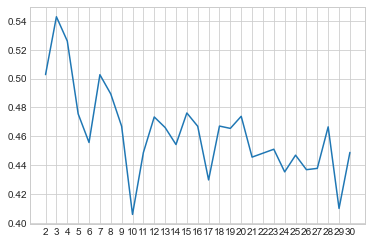

In [31]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

***LDA Model Result - Cluster change***

In [34]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=3) # train LDA model

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5323394189092899


In [36]:
for topic in lda_model.show_topics(num_topics=3, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.006*"like" + 0.006*"normal" + 0.005*"not" + 0.005*"feel" + 0.005*"think"')
(1, '0.016*"test" + 0.007*"doctor" + 0.007*"mycoplasma" + 0.006*"ask" + 0.006*"swab"')
(2, '0.008*"acid" + 0.007*"boric" + 0.007*"probiotic" + 0.006*"yeast" + 0.006*"try"')
[(0, 0.1946377455691248), (1, 0.6003375600948899), (2, 0.20567536710155956), (3, 0.18310830357491104), (4, 0.34702034451012853), (5, 0.6367549253556753)]
(0, 0.11293607)
(1, 0.13894519)
(2, 0.74811876)
 You could have utis and not know it so I wouldnt eliminate that Just talk to your doctor :  [(0, 0.112936445), (1, 0.13888739), (2, 0.74817616)]


C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
